## **Simple Linear Regression: Predicting House Prices**

**Objective:**

Your task is to build a **Linear Regression** model to predict the **price of a house** based on its size. This exercise will help you understand the relationship between variables and how to apply Linear Regression for real-world prediction tasks.

**Dataset:**

You will work with a dataset `data/housing.csv` containing the following columns:
- **price**: The price of the house in dollars.
- **area**: The size of the house in square feet.


Steps to Complete:

1. **Data Loading and Exploration**  
   - Visualize the relationship between **Size** and **Price** using a scatter plot.
   - Check for outliers, missing values, or anomalies in the dataset.

2. **Build a Linear Regression Model**  
   - Split the dataset into **training** and **test sets** (80% training, 20% testing).
   - Implement a **Simple Linear Regression** model using:
     - **Manual Calculation** (Optional): Derive the slope $m$ and intercept $b$ using the formulas for linear regression:
       $$
       m = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sum{(x_i - \bar{x})^2}}, \quad b = \bar{y} - m\bar{x}
       $$
     - **Scikit-learn**: Use `LinearRegression` from `sklearn.linear_model` to fit the model.

3. **Model Evaluation**  
   - Predict the test set house prices using the model.
   - Evaluate the model’s performance using:
     - **Mean Absolute Error (MAE)**
     - **Mean Squared Error (MSE)**
     - **R² Score**
   - Interpret the slope ($m$) and intercept ($b$) of the linear equation.

4. **Visualization**  
   - Plot the **regression line** over the scatter plot of **area** vs. **price**.
   - Visualize the residuals (errors) between the actual and predicted house prices.

5. **Prediction**  
   - Use the trained model to predict the price of a house with a size of 1,000 square feet.
   - Discuss whether the prediction seems reasonable based on the dataset.


**Deliverables:**

- A Python script or Jupyter Notebook containing:
  - Data loading, preprocessing, and visualization.
  - Implementation of Simple Linear Regression.
  - Model evaluation and insights.
  - Predictions and their interpretation.
- A brief report discussing:
  - The relationship between **Size** and **Price**.
  - The limitations of using Linear Regression for this dataset.


**Useful Hints:**

- Use `numpy` for manual calculations and matrix operations.
- Use `pandas` for data manipulation and `matplotlib`/`seaborn` for visualizations.
- Experiment with data transformations (e.g., log or scaling) to improve results.

1. Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
data = pd.read_csv('data/housing.csv')

# Display first few rows
print(data[['area', 'price']].head())

# Basic statistics
print("\nStatistics:")
print(data[['area', 'price']].describe())

   area     price
0  7420  13300000
1  8960  12250000
2  9960  12250000
3  7500  12215000
4  7420  11410000

Statistics:
               area         price
count    545.000000  5.450000e+02
mean    5150.541284  4.766729e+06
std     2170.141023  1.870440e+06
min     1650.000000  1.750000e+06
25%     3600.000000  3.430000e+06
50%     4600.000000  4.340000e+06
75%     6360.000000  5.740000e+06
max    16200.000000  1.330000e+07


2. Visualize the data

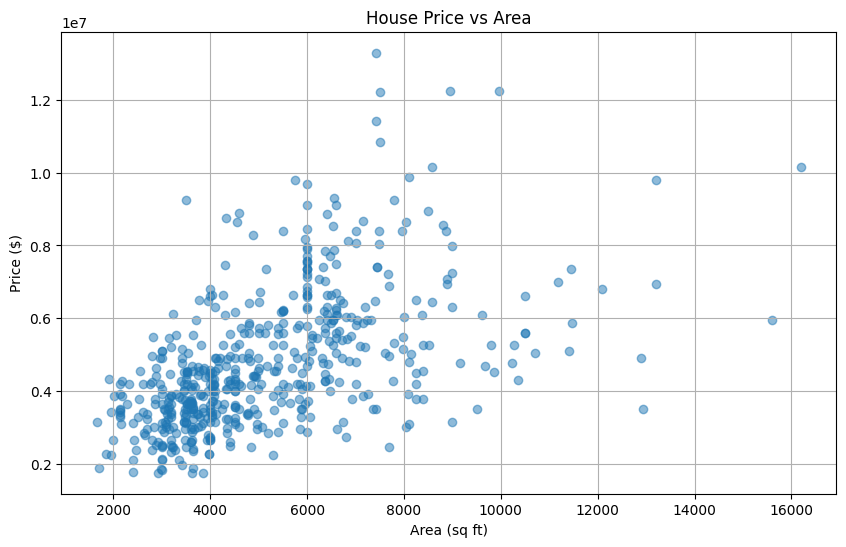

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(data['area'], data['price'], alpha=0.5)
plt.title('House Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

3. Split the data into training and test sets

In [3]:
X = data[['area']]  # Features (must be 2D array)
y = data['price']   # Target

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 436
Testing set size: 109


4. Manual Linear Regression

In [4]:
# Calculate means
x_mean = X_train['area'].mean()
y_mean = y_train.mean()

# Calculate slope (m) and intercept (b)
numerator = ((X_train['area'] - x_mean) * (y_train - y_mean)).sum()
denominator = ((X_train['area'] - x_mean) ** 2).sum()
m = numerator / denominator
b = y_mean - (m * x_mean)

print(f"Manual calculation - Slope (m): {m:.4f}, Intercept (b): {b:.2f}")

Manual calculation - Slope (m): 425.7298, Intercept (b): 2512254.26


5. Using sklearn

In [5]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get coefficients
print(f"scikit-learn - Slope (m): {model.coef_[0]:.4f}, Intercept (b): {model.intercept_:.2f}")

scikit-learn - Slope (m): 425.7298, Intercept (b): 2512254.26


6. Evaluate the model

In [6]:
# Predictions
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error: 1474748.13
Mean Squared Error: 3675286604768.19
R² Score: 0.2729


7. visualize results

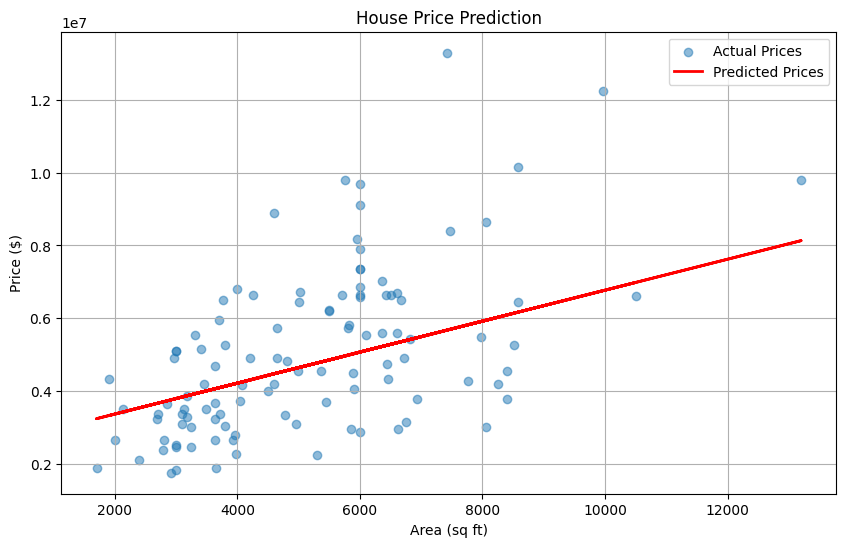

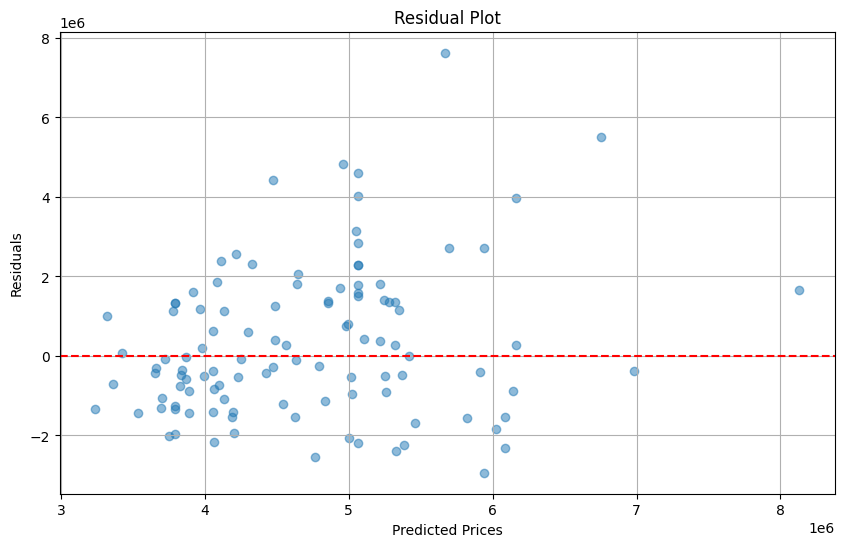

In [7]:
# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5, label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.title('House Price Prediction')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()